Confusion Matrix:
 [[49  8  6]
 [25 20  7]
 [42  4 44]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.78      0.55        63
           1       0.62      0.38      0.48        52
           2       0.77      0.49      0.60        90

    accuracy                           0.55       205
   macro avg       0.61      0.55      0.54       205
weighted avg       0.63      0.55      0.55       205

MSE: 1.1512195121951219
RMSE: 1.072948979306622
MAPE: 439375573401999.94
R2 Score: -0.5791878835357103
Best k value: 13

Confusion Matrix with Best k:
 [[47  5 11]
 [18 25  9]
 [24 12 54]]

Classification Report with Best k:
               precision    recall  f1-score   support

           0       0.53      0.75      0.62        63
           1       0.60      0.48      0.53        52
           2       0.73      0.60      0.66        90

    accuracy                           0.61       205
   macro avg       0.62      0.61      0

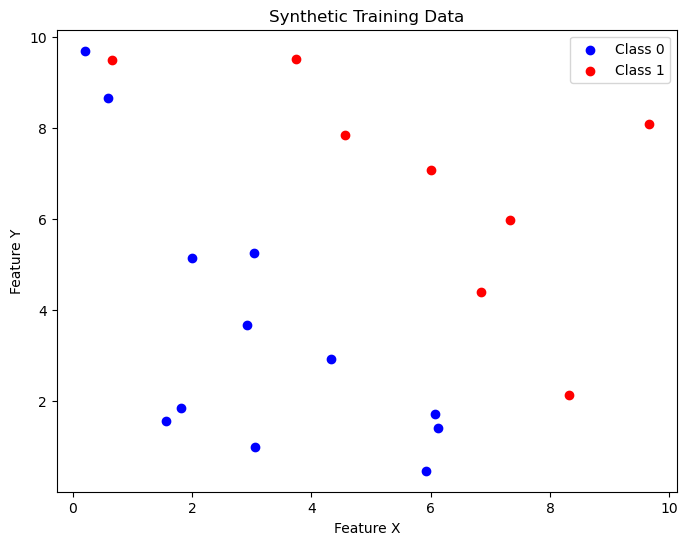

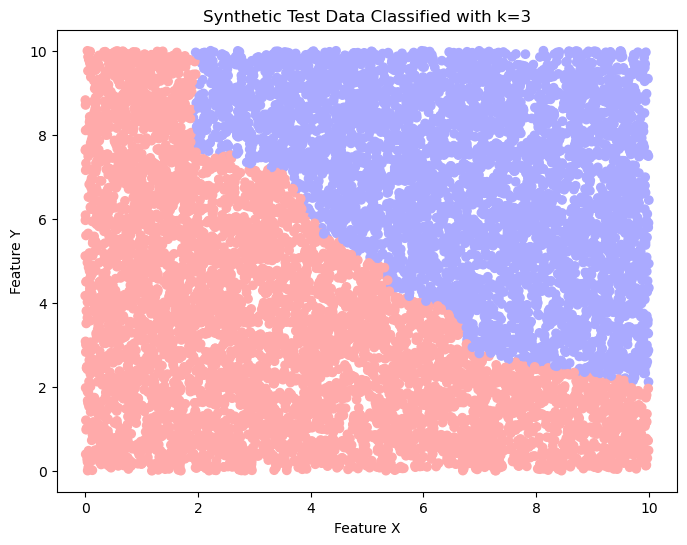

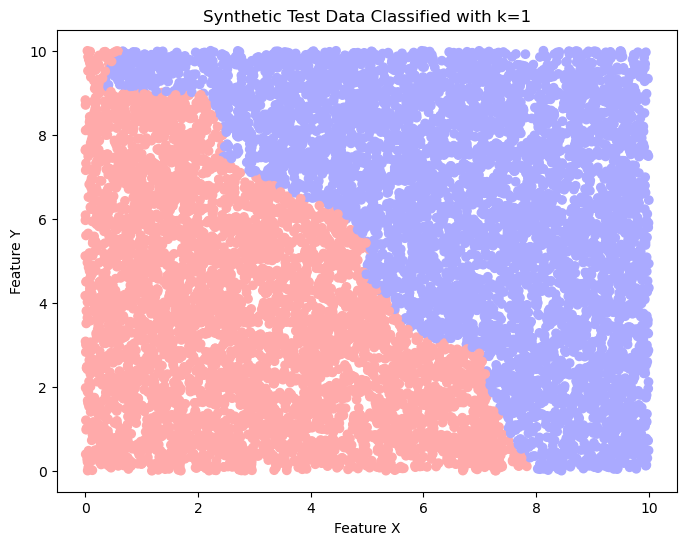

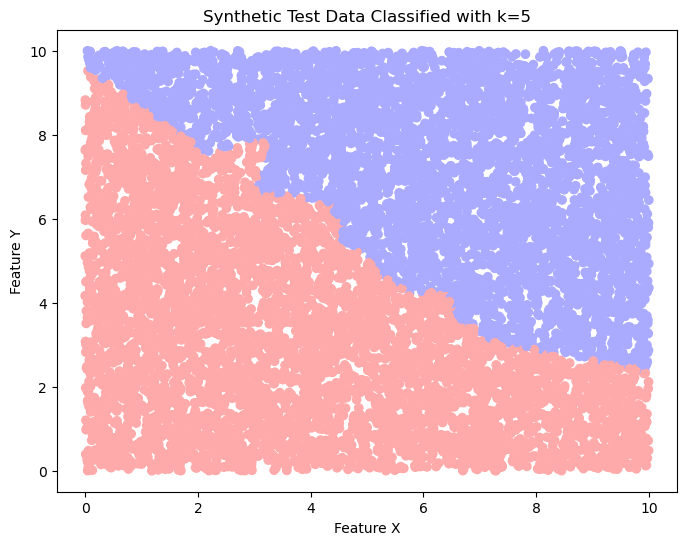

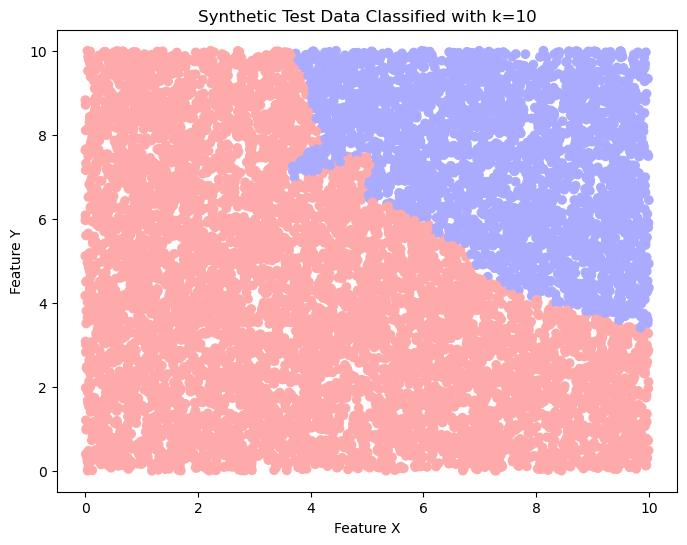

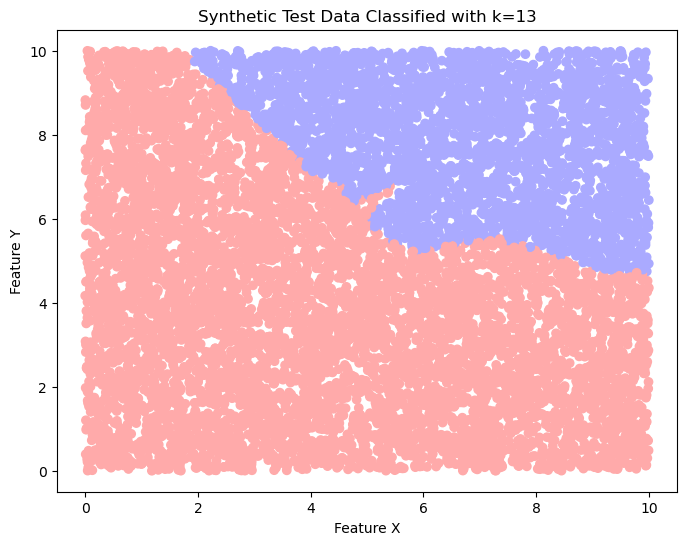

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the data from the Excel file
file_path = 'test.xlsx'
df = pd.read_excel(file_path)

# Ensure that 'Text' column is used as the independent variable
df['Text'] = df['Text'].astype(str)

# Drop any rows where 'Text' or 'Type' is NaN
df.dropna(subset=['Text', 'Type'], inplace=True)

# Define the features and labels
X = df['Text']
y = df['Type']

# Encode the labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Preprocess the text data using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Split the data into training and test sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_encoded, test_size=0.3, random_state=42)

# Train a kNN classifier (initially with k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Calculate other performance metrics (precision, recall, F1-score)
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# Calculate MSE, RMSE, MAPE, and R2 scores
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")
print(f"R2 Score: {r2}")

# Perform hyperparameter tuning using GridSearchCV to find the best k value
param_grid = {'n_neighbors': np.arange(1, 20)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best k value found
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value: {best_k}")

# Retrain the model with the best k value
best_knn = grid_search.best_estimator_
best_knn.fit(X_train, y_train)

# Evaluate the model again with the best k
y_pred_best = best_knn.predict(X_test)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
print("\nConfusion Matrix with Best k:\n", conf_matrix_best)

report_best = classification_report(y_test, y_pred_best)
print("\nClassification Report with Best k:\n", report_best)

### Additional Steps to Address Specific Questions

# A3: Generate synthetic data
np.random.seed(42)
X_synthetic = np.random.rand(20, 2) * 10  # 20 points between 0 and 10
y_synthetic = np.where(X_synthetic[:, 0] + X_synthetic[:, 1] > 10, 1, 0)  # Simple linear boundary

# Plot the synthetic data
plt.figure(figsize=(8, 6))
plt.scatter(X_synthetic[y_synthetic == 0][:, 0], X_synthetic[y_synthetic == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X_synthetic[y_synthetic == 1][:, 0], X_synthetic[y_synthetic == 1][:, 1], color='red', label='Class 1')
plt.title("Synthetic Training Data")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.legend()
plt.show()

# A4: Generate a test set with 10,000 points
X_test_synthetic = np.random.rand(10000, 2) * 10

# Classify the test set using the kNN classifier with k=3
knn_synthetic = KNeighborsClassifier(n_neighbors=3)
knn_synthetic.fit(X_synthetic, y_synthetic)
y_test_pred = knn_synthetic.predict(X_test_synthetic)

# Plot the test set with color-coded predictions
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
plt.figure(figsize=(8, 6))
plt.scatter(X_test_synthetic[:, 0], X_test_synthetic[:, 1], c=y_test_pred, cmap=cmap_light, marker='o')
plt.title("Synthetic Test Data Classified with k=3")
plt.xlabel("Feature X")
plt.ylabel("Feature Y")
plt.show()

# A5: Repeat for various values of k
for k in [1, 5, 10, best_k]:
    knn_synthetic = KNeighborsClassifier(n_neighbors=k)
    knn_synthetic.fit(X_synthetic, y_synthetic)
    y_test_pred = knn_synthetic.predict(X_test_synthetic)
    
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test_synthetic[:, 0], X_test_synthetic[:, 1], c=y_test_pred, cmap=cmap_light, marker='o')
    plt.title(f"Synthetic Test Data Classified with k={k}")
    plt.xlabel("Feature X")
    plt.ylabel("Feature Y")
    plt.show()

# A6: Repeat exercises A3 to A5 using your project data (this involves selecting specific features)
# Here, you would replicate the steps above using your actual dataset features (from 'test.xlsx') instead of synthetic data.
# The process involves generating synthetic data, fitting, predicting, and visualizing the results with different k values.
